# 自己相関と収束
## 自己相関
以下の式に従う２つのデータ列の自己相関を確認する
$$ x_t \verb|~| Normal(0,1), x_0=0 $$
$$ y_t \verb|~| Normal(y_{t-1},1),y_0=0$$
## MCMCの収束
アルゴリズムの性質上避けられない自己相関をなるべく減らすためのテクニックの一つである間引き処理の効果を確認する

In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

In [30]:
x_t = pm.rnormal(0,1,200)
x_t[0]=0

y_t=np.zeros(200)
for i in range(1,200):
    y_t[i]=pm.rnormal(y_t[i-1],1)

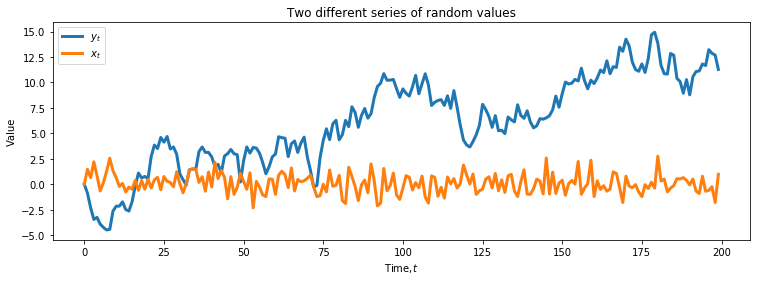

In [32]:
plt.figure(figsize=(12.5,4))

plt.plot(y_t,label="$y_t$",lw=3)
plt.plot(x_t,label="$x_t$",lw=3)

plt.xlabel("Time,$t$")
plt.ylabel("Value")
plt.title("Two different series of random values")
plt.legend()
plt.savefig("two_data.png")
plt.show()

In [4]:
def autocorr(x):
    result = np.correlate(x,x,mode="full")
    result = result/np.max(result)
    return result[result.size//2:]

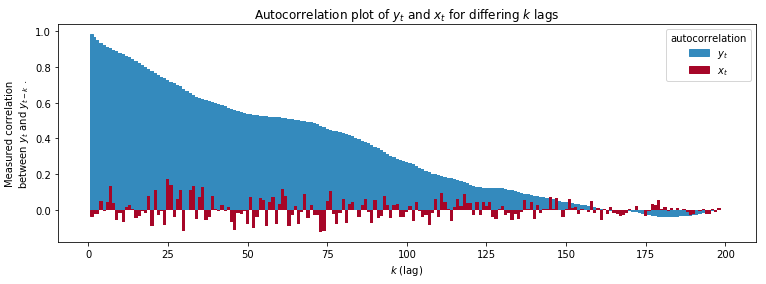

In [33]:
colors=["#348ABD","#A60628","#7A68A6"]

x=np.arange(1,200)

plt.figure(figsize=(12.5,4))
plt.bar(x,autocorr(y_t)[1:],width=1,label="$y_t$",edgecolor=colors[0],color=colors[0])
plt.bar(x,autocorr(x_t)[1:],width=1,label="$x_t$",color=colors[1],edgecolor=colors[1])

plt.legend(title="autocorrelation")
plt.ylabel("Measured correlation\n"
              "between $y_t$ and $y_{t-k}$ .")
plt.xlabel("$k$ (lag)")
plt.title("Autocorrelation plot of $y_t$ and $x_t$ "
         "for differing $k$ lags")
plt.savefig("autocorr.png")
plt.show()

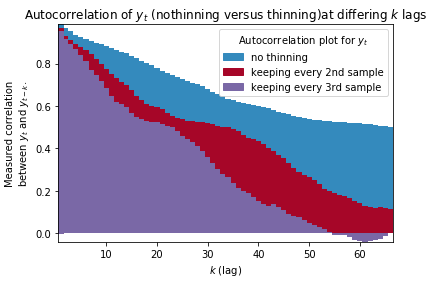

In [35]:
max_x=200//3+1
x=np.arange(1,max_x)

plt.bar(x,autocorr(y_t)[1:max_x],edgecolor=colors[0],label="no thinning",color=colors[0],width=1)
plt.bar(x,autocorr(y_t[::2])[1:max_x],edgecolor=colors[1],label="keeping every 2nd sample",color=colors[1],width=1)
plt.bar(x,autocorr(y_t[::3])[1:max_x],edgecolor=colors[2],label="keeping every 3rd sample",color=colors[2],width=1)
plt.autoscale(tight=True)
plt.legend(title="Autocorrelation plot for $y_t$",loc="upper right")
plt.ylabel("Measured correlation\n"
          "between $y_t$ and $y_{t-k}.$")
plt.xlabel("$k$ (lag)")
plt.title("Autocorrelation of $y_t$ (nothinning versus thinning)"
         "at differing $k$ lags")
plt.savefig("thinnning.png")
plt.show()

In [18]:
from pymc.Matplot import plot as mcplot
from os import makedirs
makedirs("data",exist_ok=True)
from urllib.request import urlretrieve
urlretrieve("https://git.io/vXt6b","data/mixture_data.csv")

('data/mixture_data.csv', <http.client.HTTPMessage at 0x7fa8e172b4a8>)

In [19]:

data=np.loadtxt("data/mixture_data.csv",delimiter=",")
p=pm.Uniform("p",0,1)
assignment=pm.Categorical("assignment",[p,1-p],size=data.shape[0])
taus=1.0/pm.Uniform("stds",0,33,size=2)**2
centers=pm.Normal("centers",[120,190],[0.01,0.01],size=2)

model=pm.Model([p,assignment,taus,centers])
mcmc=pm.MCMC(model)

mcmc.sample(25000,0,10)

 [-----------------100%-----------------] 25000 of 25000 complete in 3.8 secPlotting centers_0
Plotting centers_1


Plotting centers_0
Plotting centers_1


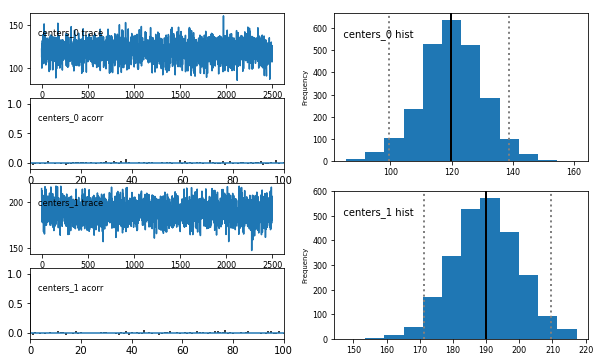

In [36]:
plt.close()
mcplot(mcmc.trace("centers",2),common_scale=False)
plt.savefig("mcplot.png")
plt.show()